In [186]:
#@title Extramarital affairs dataset that comes with Statsmodels used to explain the allocation of an individual’s time among work, time spent with a spouse, and time spent with a paramour. The data is used as an example of regression with censored data.

In [187]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [188]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [189]:
data = sm.datasets.fair.load_pandas().data

In [190]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [191]:
data.shape

(6366, 9)

In [192]:
data.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs'],
      dtype='object')

In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
dtypes: float64(9)
memory usage: 447.7 KB


The dataset contains 6366 observations of 9 variables:


*   **rate_marriage**: woman's rating of her marriage (1 = very poor, 5 = very good)
*   **age**: woman's age
*   **yrs_married**: number of years married
*   **children**: number of children
*   **religious**: woman's rating of how religious she is (1 = not religious, 4 = strongly religious)
*   **educ**: level of education (9 = grade school, 12 = high school, 14 = some 
*   **college**, 16 = college graduate, 17 = some graduate school, 20 = advanced degree)
*   **occupation**: woman's occupation (1 = student, 2 = farming/semi-skilled/unskilled, 3 = "white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business)
*   **managerial/business**, 6 = professional with advanced degree)
*   **occupation_husb**: husband's occupation (same coding as above)
*   **affairs**: time spent in extra-marital affairs














In [194]:
data['affair'] = (data.affairs > 0).astype(int)

In [195]:
data.sample(3)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
3568,5.0,27.0,2.5,0.0,3.0,20.0,6.0,1.0,0.0,0
3019,5.0,32.0,2.5,0.0,2.0,12.0,2.0,2.0,0.0,0
6087,5.0,32.0,13.0,2.0,2.0,16.0,3.0,4.0,0.0,0


In [196]:
data.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


Text(0, 0.5, 'Frequency')

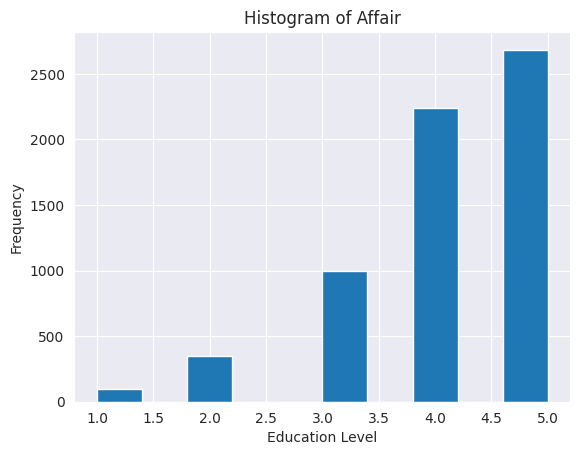

In [197]:
# histogram of education
data.rate_marriage.hist()
plt.title('Histogram of Affair')
plt.xlabel('Education Level')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

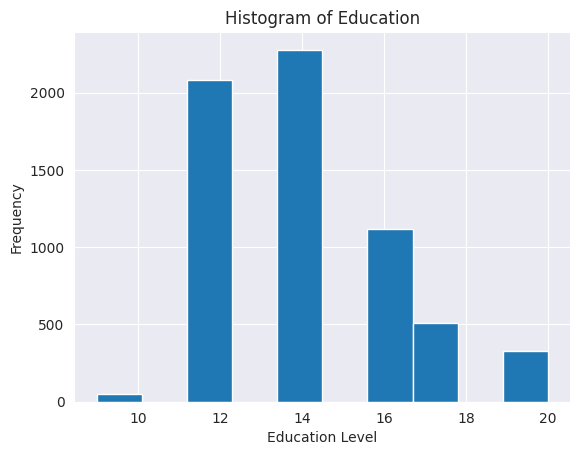

In [198]:
# histogram of education
data.educ.hist()
plt.title('Histogram of Education')
plt.xlabel('Education Level')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

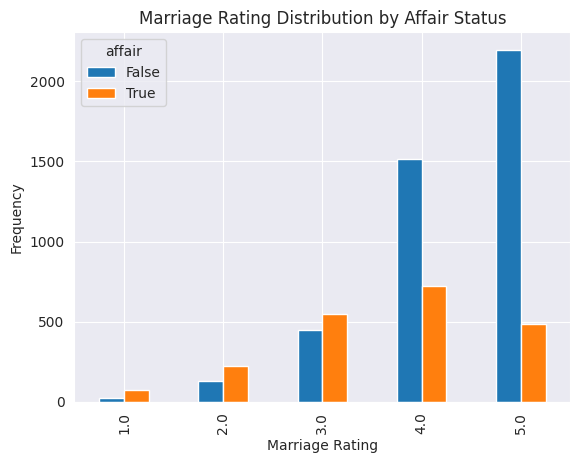

In [199]:
# barplot of marriage rating grouped by affair (True or False)
pd.crosstab(data.rate_marriage, data.affair.astype(bool)).plot(kind='bar')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

Text(0, 0.5, 'Percentage')

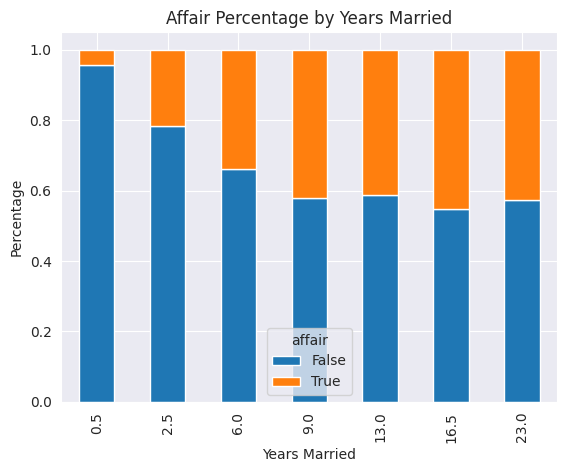

In [200]:
affair_yrs_married = pd.crosstab(data.yrs_married, data.affair.astype(bool))
affair_yrs_married.div(affair_yrs_married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Affair Percentage by Years Married')
plt.xlabel('Years Married')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

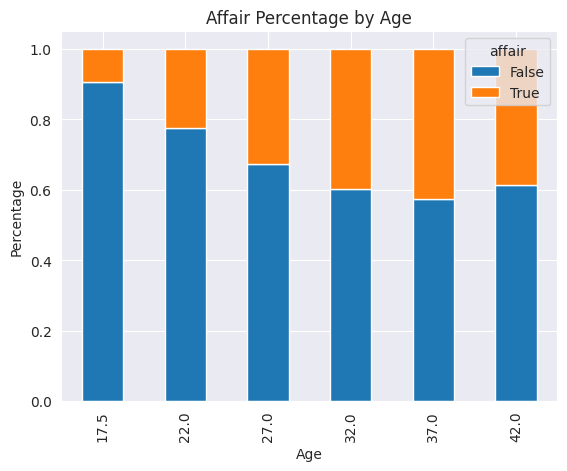

In [201]:
affair_yrs_married = pd.crosstab(data.age, data.affair.astype(bool))
affair_yrs_married.div(affair_yrs_married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Affair Percentage by Age')
plt.xlabel('Age')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

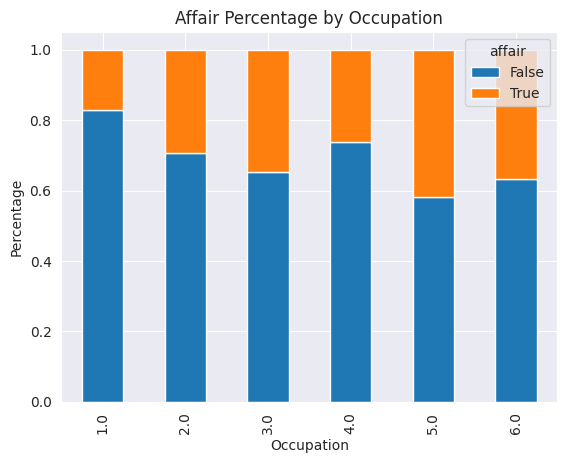

In [202]:
affair_yrs_married = pd.crosstab(data.occupation, data.affair.astype(bool))
affair_yrs_married.div(affair_yrs_married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Affair Percentage by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

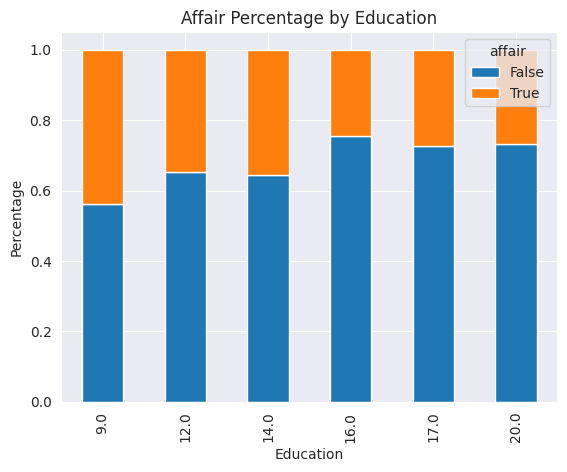

In [203]:
affair_yrs_married = pd.crosstab(data.educ, data.affair.astype(bool))
affair_yrs_married.div(affair_yrs_married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Affair Percentage by Education')
plt.xlabel('Education')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

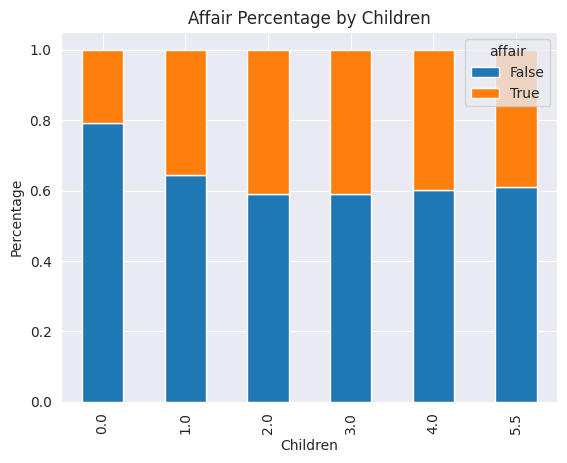

In [204]:
affair_yrs_married = pd.crosstab(data.children, data.affair.astype(bool))
affair_yrs_married.div(affair_yrs_married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Affair Percentage by Children')
plt.xlabel('Children')
plt.ylabel('Percentage')

In [205]:
# @title Model Training
data.columns 

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs', 'affair'],
      dtype='object')

In [206]:
data.sample(5)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
45,5.0,22.0,2.5,0.0,3.0,12.0,3.0,2.0,0.400000,1
1729,3.0,27.0,6.0,1.0,1.0,17.0,4.0,5.0,2.041666,1
5428,4.0,27.0,9.0,4.0,3.0,14.0,2.0,5.0,0.000000,0
6221,4.0,42.0,23.0,3.0,4.0,14.0,3.0,3.0,0.000000,0
1120,4.0,27.0,9.0,0.0,3.0,12.0,2.0,4.0,4.666666,1


In [233]:
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)', data, return_type="dataframe")
print(X.columns)
print(y)

Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')
      affair
0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
...      ...
6361     0.0
6362     0.0
6363     0.0
6364     0.0
6365     0.0

[6366 rows x 1 columns]


In [208]:
X.head()

,Intercept,C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],C(occupation)[T.6.0],C(occupation_husb)[T.2.0],C(occupation_husb)[T.3.0],C(occupation_husb)[T.4.0],C(occupation_husb)[T.5.0],C(occupation_husb)[T.6.0],rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [232]:
# fix column names of X
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
                        'C(occupation)[T.3.0]':'occ_3',
                        'C(occupation)[T.4.0]':'occ_4',
                        'C(occupation)[T.5.0]':'occ_5',
                        'C(occupation)[T.6.0]':'occ_6',
                        'C(occupation_husb)[T.2.0]':'occ_husb_2',
                        'C(occupation_husb)[T.3.0]':'occ_husb_3',
                        'C(occupation_husb)[T.4.0]':'occ_husb_4',
                        'C(occupation_husb)[T.5.0]':'occ_husb_5',
                        'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [210]:
"""
df=pd.concat([X,y],axis=1)
df.isnull().values.any()
print(df[df["affair"]==0].shape)
print(df[df["affair"]==1].shape)
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X,y=oversample.fit_resample(X,y)Q
print(df[df["affair"]==0].shape)
print(df[df["affair"]==1].shape)
"""

'\ndf=pd.concat([X,y],axis=1)\ndf.isnull().values.any()\nprint(df[df["affair"]==0].shape)\nprint(df[df["affair"]==1].shape)\n!pip install imbalanced-learn\nfrom imblearn.over_sampling import SMOTE\noversample = SMOTE()\nX,y=oversample.fit_resample(X,y)Q\nprint(df[df["affair"]==0].shape)\nprint(df[df["affair"]==1].shape)\n'

In [231]:
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [212]:
y = np.ravel(y)

In [213]:
model = LogisticRegression()
model = model.fit(X, y)
# check the accuracy on the training set
model.score(X, y)

0.7246308513980522

In [214]:
y.mean()

0.3224945020420987

In [215]:
importance = model.coef_[0]
feature_names = list(X.columns)
# summarize feature importance
for i,v in enumerate(importance):
    print('%s, Score: %.4f' % (feature_names[i], v))

Intercept, Score: 1.4232
occ_2, Score: 0.1056
occ_3, Score: 0.3555
occ_4, Score: 0.1347
occ_5, Score: 0.7381
occ_6, Score: 0.2952
occ_husb_2, Score: 0.2894
occ_husb_3, Score: 0.4191
occ_husb_4, Score: 0.2475
occ_husb_5, Score: 0.2776
occ_husb_6, Score: 0.3036
rate_marriage, Score: -0.6955
age, Score: -0.0592
yrs_married, Score: 0.1109
children, Score: -0.0098
religious, Score: -0.3758
educ, Score: 0.0132


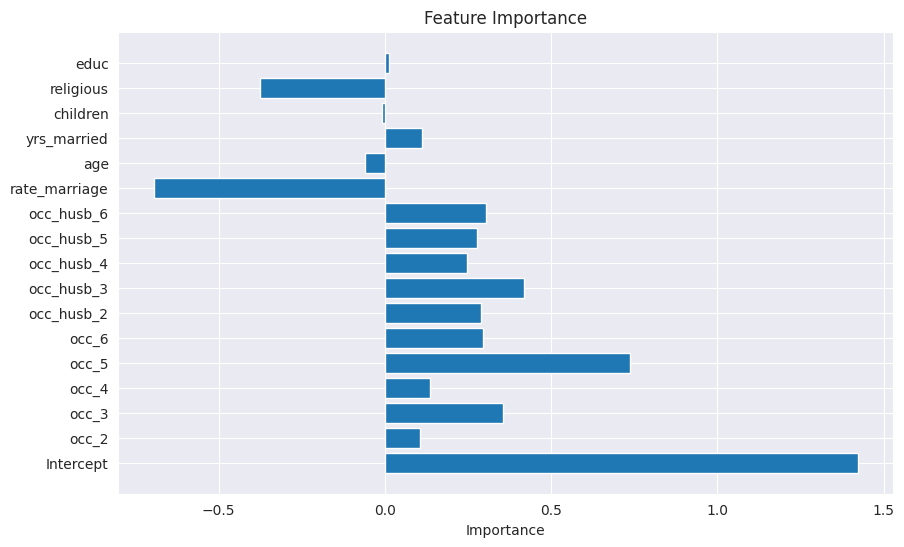

In [216]:
importance = model.coef_[0]
# Get the feature names
feature_names = list(X.columns)
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance)
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.show()

In [217]:
#@title Model Evaluation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,shuffle = True)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(4456, 17) (1910, 17) (4456,) (1910,)


In [235]:
X_test.head(1)

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
4269,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,9.0,1.0,3.0,12.0


In [218]:

LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [219]:
pred = LR.predict(X_test)
print(pred)

[1. 1. 0. ... 0. 0. 0.]


In [220]:
probs = LR.predict_proba(X_test)
print(probs)

[[0.43301241 0.56698759]
 [0.44616966 0.55383034]
 [0.62020023 0.37979977]
 ...
 [0.53517631 0.46482369]
 [0.815939   0.184061  ]
 [0.6112927  0.3887073 ]]


In [221]:
print(metrics.accuracy_score(y_test, pred))
print(metrics.roc_auc_score(y_test, probs[:, 1]))

0.731413612565445
0.7450481233833403


In [222]:
print(metrics.confusion_matrix(y_test, pred))

[[1167  132]
 [ 381  230]]


In [223]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.75      0.90      0.82      1299
         1.0       0.64      0.38      0.47       611

    accuracy                           0.73      1910
   macro avg       0.69      0.64      0.65      1910
weighted avg       0.72      0.73      0.71      1910



In [176]:
#@title Calculating scores using CVScore

from sklearn.model_selection import cross_val_score
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print(scores)
print("\n Mean Score", round((scores.mean())*100, 3))

[0.71899529 0.69858713 0.73783359 0.70800628 0.71428571 0.72841444
 0.72955975 0.70440252 0.74685535 0.75      ]

 Mean Score 72.369


In [225]:
#@title Predictions

In [226]:
X.sample(4)

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
3769,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,22.0,2.5,1.0,2.0,12.0
2962,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,2.5,0.0,3.0,14.0
2682,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,32.0,2.5,0.0,3.0,20.0
1337,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,27.0,2.5,0.0,1.0,16.0


In [227]:
X.columns

Index(['Intercept', 'occ_2', 'occ_3', 'occ_4', 'occ_5', 'occ_6', 'occ_husb_2',
       'occ_husb_3', 'occ_husb_4', 'occ_husb_5', 'occ_husb_6', 'rate_marriage',
       'age', 'yrs_married', 'children', 'religious', 'educ'],
      dtype='object')

The dataset contains 6366 observations of 9 variables:


*   **rate_marriage**: woman's rating of her marriage (1 = very poor, 5 = very good)
*   **age**: woman's age
*   **yrs_married**: number of years married
*   **children**: number of children
*   **religious**: woman's rating of how religious she is (1 = not religious, 4 = strongly religious)
*   **educ**: level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree)
*   **occupation**: woman's occupation (1 = student, 2 = farming/semi-skilled/unskilled, 3 = "white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree)
*   **occupation_husb**: husband's occupation (same coding as above)
*   **affairs**: time spent in extra-marital affairs














In [237]:
model.predict_proba(np.array([[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 25, 3, 1, 4,
                              16]]))

array([[0.77418968, 0.22581032]])

In [239]:
# saving our model using pikle
import pickle
pickle.dump((data.to_dict()),open("affair.pkl",'wb'))
pickle.dump(LR,open('logistic_model.pkl','wb'))